In [3]:
from sklearn.datasets import load_wine
wine = load_wine()
X, y = wine.data, wine.target
X.shape, y.shape, set(y)


((178, 13), (178,), {0, 1, 2})

In [6]:
import matlplotlib.pyplot as plt
i,j = 6,9
plt.xlabel(f"{i}:{wine.feature_names[i]}")
plt.ylabel(f"{j}:{wine.feature_names[j]}")
for k in set(y):
    plt.plot(X[:, i][y==k],X[:, j][y==k], 'o', label=f"{wine.target_names[k]}")
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'matlplotlib'

In [7]:
X69 = X[:, [6,9]]
X69.shape

(178, 2)

In [10]:
import numpy as np 

class vizinho():
    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        ypred = np.empty(X.shape[0])
        for i in range(X.shape[0]):
            distancias = self.distancia(X[i])
            vizinho = np.argmin(distancias)
            ypred[i] = self.y[vizinho]
        return ypred

    def distancia(self, X):
        diferenca = self.X - X 
        quadrado = diferenca ** 2
        soma = np.sum(quadrado, axis=1)
        raiz = np.sqrt(soma)
        return raiz


In [11]:
from sklearn.metrics import accuracy_score

modelo = vizinho()
modelo.fit(X69, y)
ypred = modelo.predict(X69)
acuracia = accuracy_score(y, ypred)
acuracia

1.0

In [12]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.33, random_state=42)

modelo = vizinho()
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, ypred)
acuracia

0.7796610169491526

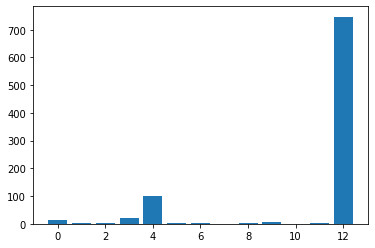

In [14]:
import matplotlib.pyplot as plt 
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show()

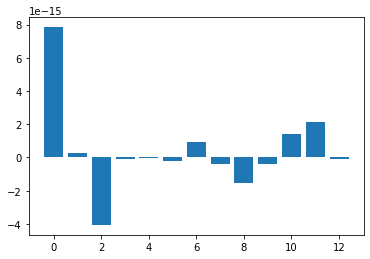

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
plt.bar(list(range(X.shape[1])), np.mean(X_new, axis=0))
plt.show()

In [20]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

modelo = LogisticRegression()
scores = cross_validate(modelo, X, y)
sempad = np.mean(scores['test_score'])
print(f"Sem Padronização {sempad}")

scores = cross_validate(modelo, X_new, y)
compad = np.mean(scores['test_score'])
print(f"Com Padronização {compad}")

Sem Padronização 0.9555555555555555
Com Padronização 0.9888888888888889


In [21]:
from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ('padronizacao', scaler),
    ('classificador', LogisticRegression())
])

scores = cross_validate(modelo, X, y)
aninhado = np.mean(scores['test_score'])
print(f"Aninhado {aninhado}")

Aninhado 0.9831746031746033


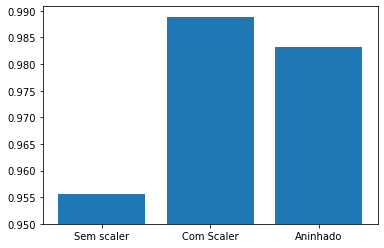

In [24]:
colunas = ["Sem scaler", "Com Scaler", "Aninhado"]
plt.bar(colunas, np.array([sempad, compad, aninhado])-0.95, bottom=0.95)
plt.show()